In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
file_path = 'abalone.data'
data = pd.read_csv(file_path, delimiter=',', header=None)

# Assign column names
column_names = [
    'Gender', 'Length', 'Diameter', 'Height', 
    'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 
    'ShellWeight', 'Rings'
]
data.columns = column_names

# Display first few rows
data.head()

,Gender,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
# Label encode the 'Gender' column (M -> 0, F -> 1)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Display first few rows
data.head()

,Gender,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [74]:
# Split data into features (X) and target (y)
X = data.drop('Rings', axis=1)
y = data['Rings']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [75]:
# Train KNN Regressor with 3 neighbors
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [76]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6594676408743605

In [79]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.419188312082008

InvalidIndexError: (slice(None, None, None), 0)

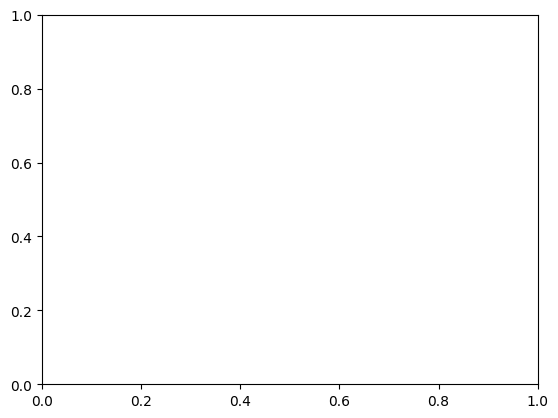

In [80]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

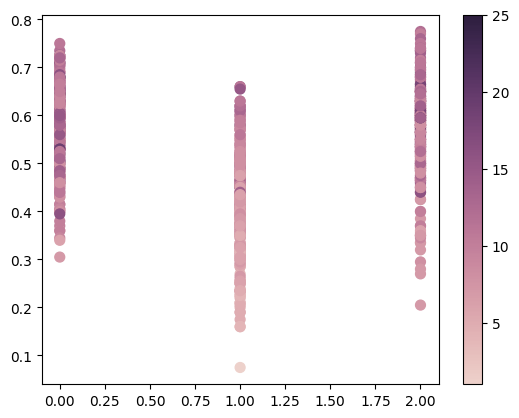

In [81]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()